In [1]:

from collections import namedtuple
from matplotlib import pyplot as plt
from math import exp
from pyDO3SE.plugins.met.solar_position import calc_solar_elevation
from pyDO3SE.plugins.met.irradiance import calc_Idrctt_Idfuse, calc_PAR_sun_shade, calc_PAR_sun_shade_farq_b


pardata = [
    0,
    0,
    0,
    0,
    0,
    0,
    24.11,
    246.16,
    459.01,
    650.18,
    793.73,
    886.63,
    897.91,
    875.35,
    796.98,
    674.13,
    500.65,
    294.78,
    71.24,
    0,
    0,
    0,
    0,
    0,
]

In [2]:


def get_hourly_output(pardata):
    dd = 100
    out = []
    for hr in range(24):
        sinB = calc_solar_elevation(40.43, -3.7, dd, hr)
        Idrctt, Idfuse, _ = calc_Idrctt_Idfuse(sinB, P=93, PAR=pardata[hr])
        Ir_beam_0 = Idrctt
        Ir_dfuse_0 = Idfuse
        cosA = 0.5
        LAI_c = 1
        out.append(calc_PAR_sun_shade_farq_b(
            sinB=sinB,
            Ir_beam_0=Ir_beam_0,
            Ir_dfuse_0=Ir_dfuse_0,
            cosA=cosA,
            LAI_c=LAI_c,
        ))
    return out



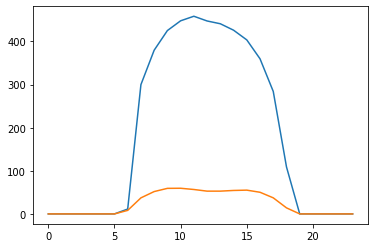

In [3]:
outputFarqb = get_hourly_output(pardata)

plt.plot([o.PARsun for o in outputFarqb])
plt.plot([o.PARshade for o in outputFarqb])



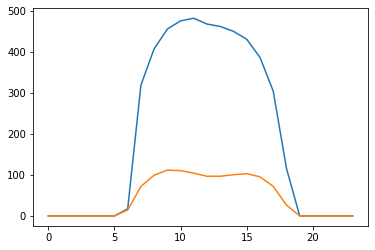

In [4]:

def get_parSunShade_from_par(PAR, sinB, P, cosA, LAI):
    Output = namedtuple('Output', 'PARsun PARshade')
    if sinB <= 0:
        return Output(0, 0)
    Idrctt, Idfuse, _ = calc_Idrctt_Idfuse(sinB, P, PAR=PAR)
    C = 4.57
    PARshade = Idfuse * C * exp(-0.5 * (LAI**0.8)) + 0.07 * Idrctt * C * \
        (1.1 - (0.1 * LAI)) * exp(-sinB)
    PARsun = Idrctt * C * 0.8 * (cosA / sinB) + PARshade
    return Output(PARsun / C, PARshade / C)


def get_hourly_output_UI(pardata):
    dd = 100
    out = []
    for hr in range(24):
        sinB = calc_solar_elevation(40.43, -3.7, dd, hr)
        cosA = 0.5
        out.append(get_parSunShade_from_par(
            PAR=pardata[hr],
            sinB=sinB,
            P=93,
            cosA=cosA,
            LAI=1,
        ))
    return out


output_ui = get_hourly_output_UI(pardata)

plt.plot([o.PARsun for o in output_ui])
plt.plot([o.PARshade for o in output_ui])


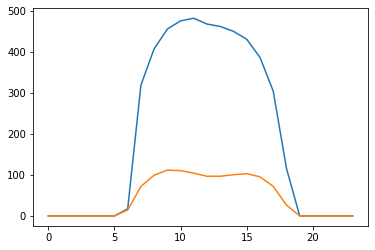

In [5]:


def get_parSunShade_from_par_old(PAR, sinB, P, cosA, LAI):
    Idrctt, Idfuse, _ = calc_Idrctt_Idfuse(sinB, P, PAR=PAR)
    return calc_PAR_sun_shade(Idrctt, Idfuse, sinB, cosA, LAI)


def get_hourly_output_old(pardata):
    dd = 100
    out = []
    for hr in range(24):
        sinB = calc_solar_elevation(40.43, -3.7, dd, hr)
        cosA = 0.5
        out.append(get_parSunShade_from_par_old(
            PAR=pardata[hr],
            sinB=sinB,
            P=93,
            cosA=cosA,
            LAI=1,
        ))
    return out


output_old = get_hourly_output_old(pardata)

plt.plot([o.PARsun for o in output_old])
plt.plot([o.PARshade for o in output_old])

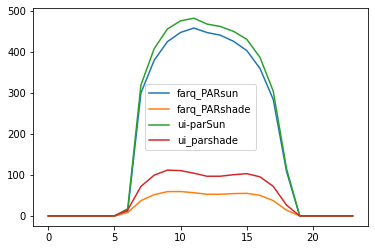

In [6]:
plt.plot([o.PARsun for o in outputFarqb], label="farq_PARsun")
plt.plot([o.PARshade for o in outputFarqb], label="farq_PARshade")

plt.plot([o.PARsun for o in output_ui], label='ui-parSun')
plt.plot([o.PARshade for o in output_ui], label='ui_parshade')
# plt.plot([o.PARsun for o in output_old], label='old-parSun')
# plt.plot([o.PARshade for o in output_old], label='old_parshade')
plt.legend()

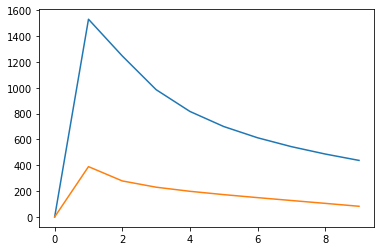

In [7]:
# ======================== SINB Variance ==================


def get_sinb_output_UI(pardata):
    dd = 100
    out = []
    for sinB in range(0, 10):
        cosA = 0.5
        out.append(get_parSunShade_from_par(
            PAR=pardata[12],
            sinB=sinB / 10.0,
            P=93,
            cosA=cosA,
            LAI=1,
        ))
    return out


output_ui_sin = get_sinb_output_UI(pardata)

plt.plot([o.PARsun for o in output_ui_sin])
plt.plot([o.PARshade for o in output_ui_sin])


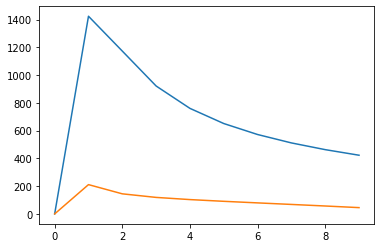

In [8]:


def get_par_output_farq(pardata):
    dd = 100
    out = []
    for sinB in range(0, 10):
        Idrctt, Idfuse, _ = calc_Idrctt_Idfuse(sinB / 10.0, P=93, PAR=pardata[12])
        Ir_beam_0 = Idrctt
        Ir_dfuse_0 = Idfuse
        cosA = 0.5
        LAI_c = 1
        out.append(calc_PAR_sun_shade_farq_b(
            sinB=sinB / 10.0,
            Ir_beam_0=Ir_beam_0,
            Ir_dfuse_0=Ir_dfuse_0,
            cosA=cosA,
            LAI_c=LAI_c,
        ))
    return out


outputFarqb_sin = get_par_output_farq(pardata)

plt.plot([o.PARsun for o in outputFarqb_sin])
plt.plot([o.PARshade for o in outputFarqb_sin])

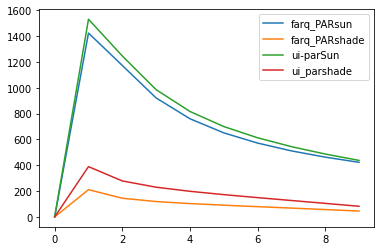

In [9]:
plt.plot([o.PARsun for o in outputFarqb_sin], label="farq_PARsun")
plt.plot([o.PARshade for o in outputFarqb_sin], label="farq_PARshade")

plt.plot([o.PARsun for o in output_ui_sin], label='ui-parSun')
plt.plot([o.PARshade for o in output_ui_sin], label='ui_parshade')
plt.legend()


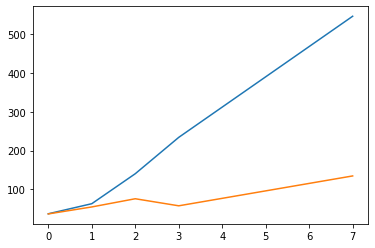

In [10]:
# ======================== PAR Variance ==================


def get_par_output_UI(pardata):
    out = []
    for PAR in range(0, 800, 100):
        cosA = 0.5
        sinB = 0.5
        out.append(get_parSunShade_from_par(
            PAR=PAR,
            sinB=sinB,
            P=93,
            cosA=cosA,
            LAI=1,
        ))
    return out


output_ui_par = get_par_output_UI(pardata)

plt.plot([o.PARsun for o in output_ui_par])
plt.plot([o.PARshade for o in output_ui_par])


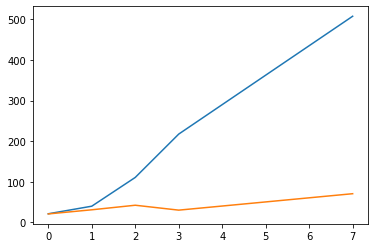

In [11]:


def get_par_output_farq(pardata):
    dd = 100
    out = []
    for PAR in range(0, 800, 100):
        sinB = 0.5
        Idrctt, Idfuse, _ = calc_Idrctt_Idfuse(sinB, P=93, PAR=PAR)
        Ir_beam_0 = Idrctt
        Ir_dfuse_0 = Idfuse
        cosA = 0.5
        LAI_c = 1
        out.append(calc_PAR_sun_shade_farq_b(
            sinB=sinB,
            Ir_beam_0=Ir_beam_0,
            Ir_dfuse_0=Ir_dfuse_0,
            cosA=cosA,
            LAI_c=LAI_c,
        ))
    return out


outputFarqb_par = get_par_output_farq(pardata)

plt.plot([o.PARsun for o in outputFarqb_par])
plt.plot([o.PARshade for o in outputFarqb_par])

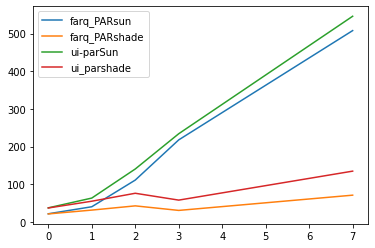

In [12]:
plt.plot([o.PARsun for o in outputFarqb_par], label="farq_PARsun")
plt.plot([o.PARshade for o in outputFarqb_par], label="farq_PARshade")

plt.plot([o.PARsun for o in output_ui_par], label='ui-parSun')
plt.plot([o.PARshade for o in output_ui_par], label='ui_parshade')
plt.legend()
